In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/inesm/OneDrive/Bureau/gomycode/titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
l=len(data['Cabin'])
print(l)

891


In [6]:
#Cabin has 687 missing value out of 891, that's why we will keep a copy of this collumn and drop it from our data
cabin_only = data[["Cabin"]].copy()

In [7]:
cabin_only.head()

,Cabin
0,NaN
1,C85
2,NaN
3,C123
4,NaN


In [8]:
data.drop(['Cabin'], axis=1, inplace=True)

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [10]:
data["Age"].fillna(data["Age"].mean(), inplace=True)

In [11]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
data["Embarked"].fillna('S', inplace=True)
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<AxesSubplot:title={'center':'histogram of ages'}, xlabel='age', ylabel='Frequency'>

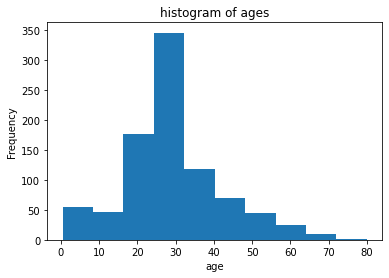

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.title("histogram of ages")
plt.xlabel("age")
data["Age"].plot.hist()

(array([0, 1, 2]), [Text(0, 0, 'S'), Text(1, 0, 'C'), Text(2, 0, 'Q')])

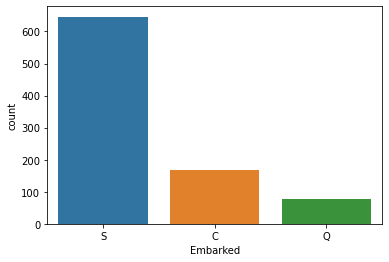

In [14]:
sns.countplot(x="Embarked" ,data=data)
plt.xticks()

In [15]:
print(data['Pclass'].value_counts())


3    491
1    216
2    184
Name: Pclass, dtype: int64


male      577
female    314
Name: Sex, dtype: int64


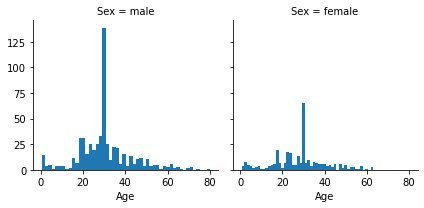

In [16]:
print(data['Sex'].value_counts())

g=sns.FacetGrid(data,col='Sex')
g.map(plt.hist, 'Age',bins=50)

C:\Users\inesm\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


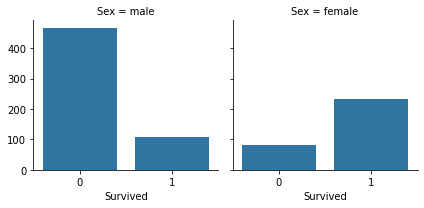

In [17]:
g=sns.FacetGrid(data,col='Sex')
g.map(sns.countplot, 'Survived')

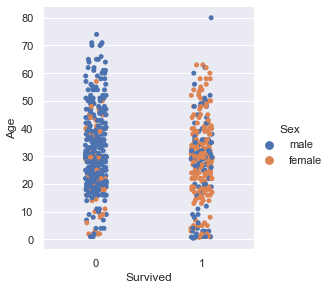

In [18]:
import seaborn as sns  
sns.set(style="darkgrid")  
g = sns.catplot(x="Survived", hue="Sex", y="Age", data=data, height=4, aspect=.9)

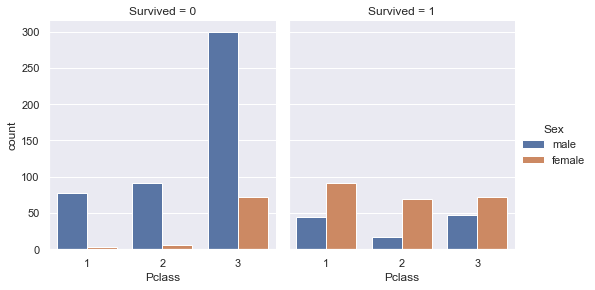

In [19]:
g = sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=.9)

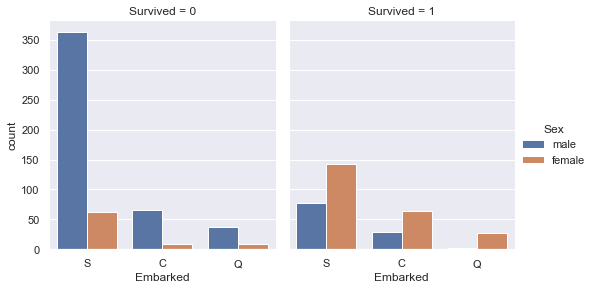

In [20]:
g = sns.catplot(x="Embarked", hue="Sex", col="Survived",
                data=data, kind="count",
                height=4, aspect=.9)

In [21]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax, annot = True, annot_kws = { 'fontsize' : 12 } )

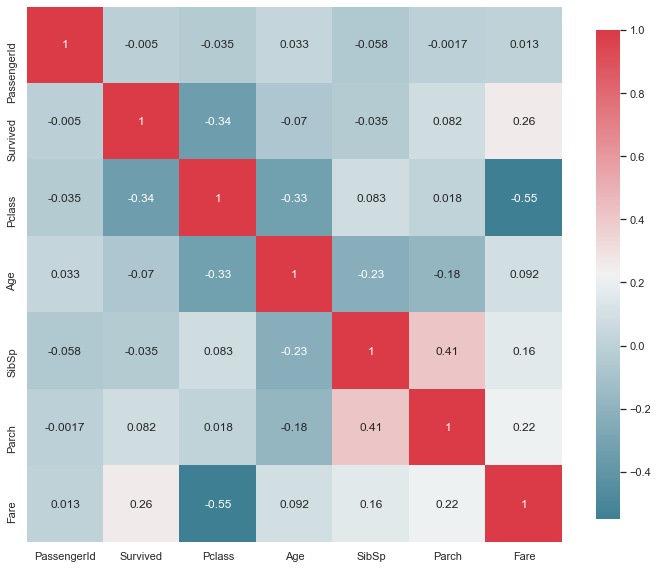

In [22]:
plot_correlation_map( data )

## plot_correlation_map() function finds the correlation between all  numerical pairs in our data then plot the results in a color-encoded matrix. the palette used for coloring is determined by .diverging_palette() function.

In [23]:
data[['Pclass','Survived']].groupby(['Pclass'],as_index=True).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [24]:
# as for cabin column, we will copy all the columns that we will drop for unpredicted use
droped_Columns = data[["Name",'PassengerId','Ticket']].copy()
data.drop(['Name','PassengerId','Ticket'], axis=1, inplace = True)

In [25]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
droped_Columns.head()

,Name,PassengerId,Ticket
0,"Braund, Mr. Owen Harris",1,A/5 21171
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,PC 17599
2,"Heikkinen, Miss. Laina",3,STON/O2. 3101282
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,113803
4,"Allen, Mr. William Henry",5,373450


In [27]:
import numpy as np
title=[]
name_Col=droped_Columns['Name']

for name in name_Col:
    x=name.split(',')[1]
    title.append(x.split('.')[0])
dA=pd.DataFrame(title,columns = ['Title'])    
data=pd.concat([data,dA], axis=1)

In [28]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr
1,1,1,female,38.0,1,0,71.2833,C,Mrs
2,1,3,female,26.0,0,0,7.9250,S,Miss
3,1,1,female,35.0,1,0,53.1000,S,Mrs
4,0,3,male,35.0,0,0,8.0500,S,Mr


In [30]:
data['Title'].value_counts()

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Major             2
 Mlle              2
 Col               2
 Don               1
 Jonkheer          1
 the Countess      1
 Lady              1
 Mme               1
 Ms                1
 Capt              1
 Sir               1
Name: Title, dtype: int64

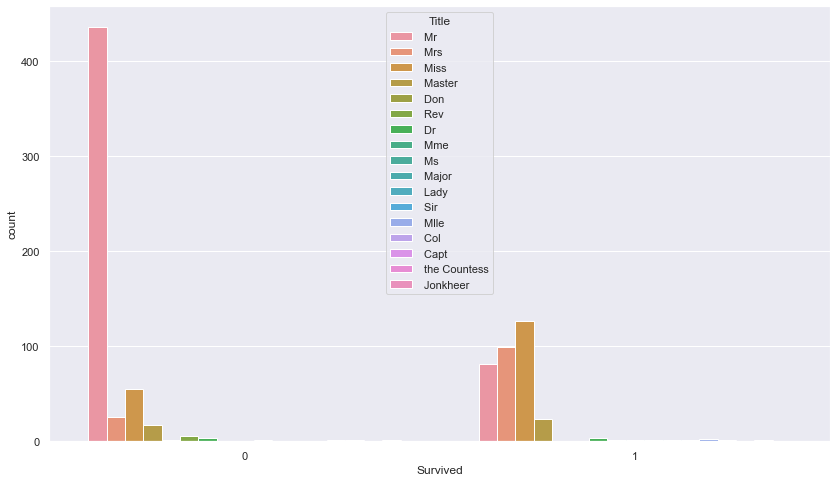

In [31]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="Survived", hue="Title", data=data)

In [33]:
Title_Dictionary = {
                    " Capt":"Officer",
                    " Col": "Officer",
                    " Major": "Officer",
                      " Dr": "Officer",
                    " Rev": "Officer",
                    " Jonkheer": "Royalty",
                    " Don": "Royalty",
                    " Sir" : "Royalty",
                   " Lady" : "Royalty",
                  " the Countess" : "Royalty",
                    " Dona": "Royalty" ,
                    " Mme":  "Miss",
                    " Mlle": "Miss",
                    " Miss" :"Miss",
                    " Ms":  "Mrs",
                    " Mr" : "Mrs",
                    " Mrs" :"Mrs",
                    " Master" :"Master"
                    }
data['Title']=data['Title'].map(Title_Dictionary)

In [35]:
data['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

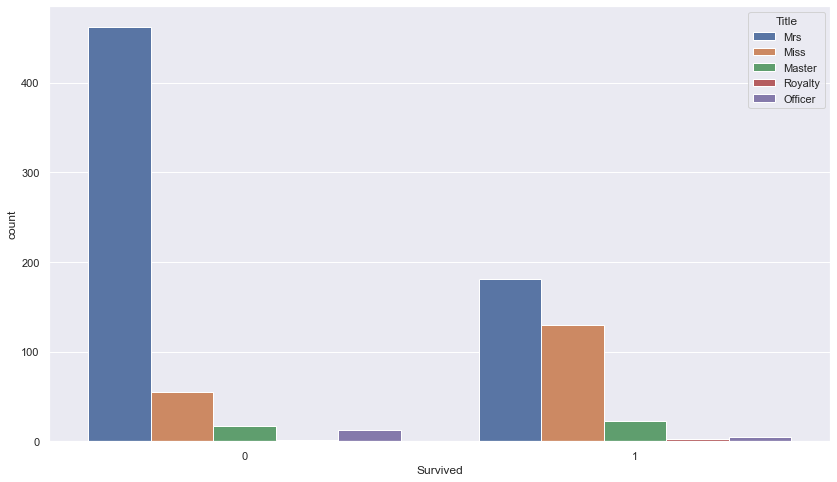

In [36]:
plt.figure(figsize=(14,8))
ax = sns.countplot(x="Survived", hue="Title", data=data)

In [38]:
data["familyMembers"]= data["SibSp"]+data["Parch"]
data=data.drop("SibSp", axis = 1)
data=data.drop("Parch", axis = 1)
data

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,familyMembers
0,0,3,male,22.000000,7.2500,S,Mrs,1
1,1,1,female,38.000000,71.2833,C,Mrs,1
2,1,3,female,26.000000,7.9250,S,Miss,0
3,1,1,female,35.000000,53.1000,S,Mrs,1
4,0,3,male,35.000000,8.0500,S,Mrs,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,Officer,0
887,1,1,female,19.000000,30.0000,S,Miss,0
888,0,3,female,29.699118,23.4500,S,Miss,3
889,1,1,male,26.000000,30.0000,C,Mrs,0
